# Motor Vehicle Collisions - Crashes
Datos sobre accidentes vehiculares en la ciudad de Nueva York
Datos hasta agosto de 2024

# Carga de datos
Una vez que tengamos nuestros datos del archivo 'Motor_Vehicle_Collisions_-_Crashes_20241009.csv', lo siguiente será localizarlos en la carpeta del proyecto, posteriormente haciendo uso de la libreria pandas, leeremos el documento y crearemos un nuevo objeto 'df' que contendra estos datos. Una vez completado podremos ver los datos.

In [1]:
!pip install geopandas
!pip install geodatasets
!pip install folium

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import plugins

In [3]:
df = pd.read_csv('./Motor_Vehicle_Collisions_Crashes.csv')
df

/tmp/ipykernel_5159/2823255202.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Motor_Vehicle_Collisions_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124638,08/06/2024,12:00,QUEENS,11001.0,NaN,NaN,NaN,JAMAICA AVENUE,LITTLE NECK PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,4746496,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2124639,08/05/2024,5:00,QUEENS,11434.0,NaN,NaN,NaN,132 AVENUE,155 STREET,NaN,...,NaN,NaN,NaN,NaN,4746463,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2124640,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
2124641,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746469,Sedan,Pick-up Truck,NaN,NaN,NaN


## LIMPIEZA DE LOS DATOS
Removemos los NaN de los datos para que no se propaguen y no causen problemas futuros 

In [4]:
df = df.fillna('0')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,0,0,0,0,0,WHITESTONE EXPRESSWAY,20 AVENUE,0,...,Unspecified,0,0,0,4455765,Sedan,Sedan,0,0,0
1,03/26/2022,11:45,0,0,0,0,0,QUEENSBORO BRIDGE UPPER,0,0,...,0,0,0,0,4513547,Sedan,0,0,0,0
2,06/29/2022,6:55,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4541903,Sedan,Pick-up Truck,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124638,08/06/2024,12:00,QUEENS,11001.0,0,0,0,JAMAICA AVENUE,LITTLE NECK PARKWAY,0,...,Unspecified,0,0,0,4746496,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2124639,08/05/2024,5:00,QUEENS,11434.0,0,0,0,132 AVENUE,155 STREET,0,...,0,0,0,0,4746463,Station Wagon/Sport Utility Vehicle,0,0,0,0
2124640,07/29/2024,2:30,0,0,40.723442,-73.93899,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,Unspecified,0,0,0,4746455,Tractor Truck Diesel,Sedan,0,0,0
2124641,08/02/2024,15:48,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4746469,Sedan,Pick-up Truck,0,0,0


In [5]:
df.shape

(2124643, 29)

In [6]:
df_zero_mask = df == 0

In [7]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis = 1)

In [8]:
sum(feature_zero_mask)

0

In [9]:
df_clean1 = df.loc[~feature_zero_mask, :].copy()
df_clean1.shape

(2124643, 29)

In [10]:
df_clean1['COLLISION_ID'].nunique()

2124643

In [11]:
#Los datos ya estaban sanitizados

In [12]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124643 entries, 0 to 2124642
Data columns (total 29 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   CRASH DATE                     object
 1   CRASH TIME                     object
 2   BOROUGH                        object
 3   ZIP CODE                       object
 4   LATITUDE                       object
 5   LONGITUDE                      object
 6   LOCATION                       object
 7   ON STREET NAME                 object
 8   CROSS STREET NAME              object
 9   OFF STREET NAME                object
 10  NUMBER OF PERSONS INJURED      object
 11  NUMBER OF PERSONS KILLED       object
 12  NUMBER OF PEDESTRIANS INJURED  int64 
 13  NUMBER OF PEDESTRIANS KILLED   int64 
 14  NUMBER OF CYCLIST INJURED      int64 
 15  NUMBER OF CYCLIST KILLED       int64 
 16  NUMBER OF MOTORIST INJURED     int64 
 17  NUMBER OF MOTORIST KILLED      int64 
 18  CONTRIBUTING FACTOR VEHICLE

In [13]:
df_clean1['BOROUGH'].value_counts()

BOROUGH
0                660758
BROOKLYN         466672
QUEENS           392645
MANHATTAN        326499
BRONX            216694
STATEN ISLAND     61375
Name: count, dtype: int64

In [14]:
valid_Borough_mask = df_clean1['BOROUGH'] != '0'

In [15]:
valid_Borough_mask[0:5]

0    False
1    False
2    False
3     True
4     True
Name: BOROUGH, dtype: bool

In [16]:
sum(valid_Borough_mask)

1463885

In [17]:
df_clean2 = df_clean1.loc[valid_Borough_mask, :].copy()

In [18]:
df_clean2.shape

(1463885, 29)

In [19]:
df_clean2['BOROUGH'].value_counts()

BOROUGH
BROOKLYN         466672
QUEENS           392645
MANHATTAN        326499
BRONX            216694
STATEN ISLAND     61375
Name: count, dtype: int64

In [20]:
df_clean2

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
7,12/14/2021,8:17,BRONX,10475.0,40.86816,-73.83148,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,Unspecified,0,0,0,4486660,Sedan,Sedan,0,0,0
8,12/14/2021,21:10,BROOKLYN,11207.0,40.67172,-73.8971,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,Unspecified,0,0,0,4487074,Sedan,0,0,0,0
9,12/14/2021,14:58,MANHATTAN,10017.0,40.75144,-73.97397,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,0,...,Unspecified,0,0,0,4486519,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124634,08/06/2024,15:15,BROOKLYN,11207.0,0,0,0,0,0,318 PENNSYLVANIA AVENUE,...,0,0,0,0,4746361,Station Wagon/Sport Utility Vehicle,0,0,0,0
2124635,08/04/2024,23:30,QUEENS,11105.0,0,0,0,STEINWAY STREET,21 AVENUE,0,...,Unspecified,0,0,0,4746565,Sedan,Bike,0,0,0
2124637,08/06/2024,17:00,STATEN ISLAND,10308.0,0.0,0.0,"(0.0, 0.0)",OCEAN ROAD,MIDLAND ROAD,0,...,Failure to Yield Right-of-Way,0,0,0,4746120,Sedan,Bike,0,0,0
2124638,08/06/2024,12:00,QUEENS,11001.0,0,0,0,JAMAICA AVENUE,LITTLE NECK PARKWAY,0,...,Unspecified,0,0,0,4746496,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0


In [21]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

CONTRIBUTING FACTOR VEHICLE 5
0                                              1457691
Unspecified                                       6011
Other Vehicular                                    116
Driver Inattention/Distraction                      14
Pavement Slippery                                   12
Alcohol Involvement                                  7
Driver Inexperience                                  5
Following Too Closely                                4
Traffic Control Disregarded                          3
Fell Asleep                                          3
Drugs (illegal)                                      2
Reaction to Uninvolved Vehicle                       2
Failure to Yield Right-of-Way                        2
Obstruction/Debris                                   2
Passing or Lane Usage Improper                       1
Aggressive Driving/Road Rage                         1
Passing Too Closely                                  1
Fatigued/Drowsy                    

In [22]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Other Vehicular                   594801
Driver Inattention/Distraction    282762
Failure to Yield Right-of-Way      93146
Backing Unsafely                   61448
Following Too Closely              49224
                                   ...  
Shoulders Defective/Improper          54
Windshield Inadequate                 54
Texting                               30
Listening/Using Headphones            15
1                                      8
Name: count, Length: 61, dtype: int64

In [23]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

CONTRIBUTING FACTOR VEHICLE 2
Other Vehicular                     1061004
0                                    242417
Driver Inattention/Distraction        64028
Failure to Yield Right-of-Way         12599
Passing or Lane Usage Improper         7825
                                     ...   
Listening/Using Headphones                9
Windshield Inadequate                     7
Using On Board Navigation Device          6
1                                         3
Texting                                   2
Name: count, Length: 61, dtype: int64

In [24]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

CONTRIBUTING FACTOR VEHICLE 3
0                                                        1372369
Other Vehicular                                            89057
Driver Inattention/Distraction                               738
Following Too Closely                                        335
Fatigued/Drowsy                                              245
Pavement Slippery                                            141
Driver Inexperience                                           92
Traffic Control Disregarded                                   81
Failure to Yield Right-of-Way                                 80
Passing or Lane Usage Improper                                72
Alcohol Involvement                                           72
Backing Unsafely                                              61
Unsafe Speed                                                  56
Fell Asleep                                                   47
Outside Car Distraction                                     

In [25]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

CONTRIBUTING FACTOR VEHICLE 4
0                                              1442228
Other Vehicular                                  21349
Driver Inattention/Distraction                      77
Pavement Slippery                                   32
Following Too Closely                               31
Fatigued/Drowsy                                     28
Fell Asleep                                         17
Traffic Control Disregarded                         13
Alcohol Involvement                                 12
Driver Inexperience                                 11
Failure to Yield Right-of-Way                       11
Backing Unsafely                                     7
Reaction to Uninvolved Vehicle                       7
Unsafe Speed                                         6
Passing or Lane Usage Improper                       6
Obstruction/Debris                                   6
Aggressive Driving/Road Rage                         5
Brakes Defective                   

In [26]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

CONTRIBUTING FACTOR VEHICLE 5
0                                              1457691
Other Vehicular                                   6127
Driver Inattention/Distraction                      14
Pavement Slippery                                   12
Alcohol Involvement                                  7
Driver Inexperience                                  5
Following Too Closely                                4
Fell Asleep                                          3
Traffic Control Disregarded                          3
Reaction to Uninvolved Vehicle                       2
Drugs (illegal)                                      2
Obstruction/Debris                                   2
Failure to Yield Right-of-Way                        2
Aggressive Driving/Road Rage                         1
Steering Failure                                     1
Traffic Control Device Improper/Non-Working          1
Failure to Keep Right                                1
Backing Unsafely                   

In [27]:
valid_vehicleType1_mask = df_clean2['VEHICLE TYPE CODE 1'] != '0'

In [28]:
sum(valid_vehicleType1_mask)

1452940

In [29]:
df_clean3 = df_clean2.loc[valid_vehicleType1_mask,:].copy()

In [30]:
df_clean3.shape

(1452940, 29)

In [31]:
df_clean3['VEHICLE TYPE CODE 1'].value_counts()

VEHICLE TYPE CODE 1
Sedan                                  387568
PASSENGER VEHICLE                      310357
Station Wagon/Sport Utility Vehicle    301214
SPORT UTILITY / STATION WAGON          134209
Taxi                                    35061
                                        ...  
Picku                                       1
TKTR                                        1
Const                                       1
none                                        1
GOVERMENT                                   1
Name: count, Length: 1343, dtype: int64

In [32]:
df = df_clean3.loc[valid_vehicleType1_mask,:].copy()

## Cantidad de accidentes por ciudad
procedemos a crear otro dataframe pero ahora con los datos de las ciudades, posteriormente contaremos cuantos registros tiene cada ciudad y finalmente lo graficamos para ver los datos de manera mas clara.

In [33]:
cities = df['BOROUGH']

In [34]:
cities_counts = df['BOROUGH'].value_counts()

In [35]:
citiesTotal= {'Brooklyn': cities_counts.get('BROOKLYN',0),
             'Bronx': cities_counts.get('BRONX',0),
             'Manhattan': cities_counts.get('MANHATTAN',0),
             'Queens': cities_counts.get('QUEENS',0),
             'StatenIsland': cities_counts.get('STATEN ISLAND',0),
             'Not Available': cities_counts.get('0',0
                                               )}

In [36]:
ocurrences = cities.unique()

In [37]:
citiesTotal
citiesTotal_Df = DataFrame.from_dict(citiesTotal, orient = 'index', columns=['Count'])



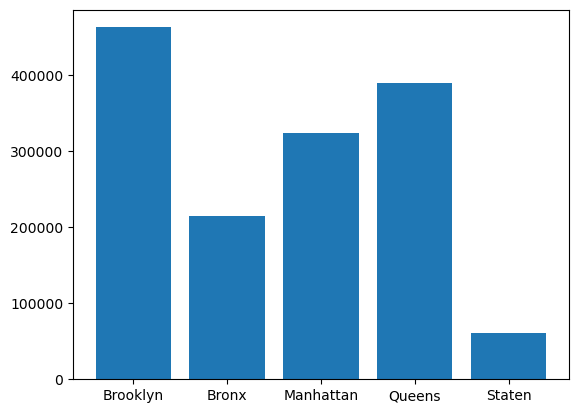

In [38]:
names = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten']
values = [
    citiesTotal_Df.loc['Brooklyn', 'Count'],
    citiesTotal_Df.loc['Bronx', 'Count'],
    citiesTotal_Df.loc['Manhattan', 'Count'],
    citiesTotal_Df.loc['Queens', 'Count'],
    citiesTotal_Df.loc['StatenIsland', 'Count'],
]
plt.bar(names, values)
plt.show()

# Queens
## Numero de accidentes por calle en Queens
Comenzando con la ciudad de Queens, realizaremos un dataframe con los registros en esta ciudad, calcularemos el promedio de accidentes y graficaremos las calles con mayor cantidad de accidentes.

In [39]:
df_queens = df.loc[df['BOROUGH']=='QUEENS']
df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')
df_queens

/tmp/ipykernel_5159/219992538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.75577,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,Other Vehicular,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
14,12/14/2021,23:10,QUEENS,11434.0,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,0,...,Other Vehicular,0,0,0,4486635,Sedan,Sedan,0,0,0
22,12/13/2021,6:30,QUEENS,11372.0,40.75373,-73.88505,"(40.75373, -73.88505)",82 STREET,34 AVENUE,0,...,0,0,0,0,4486967,Sedan,0,0,0,0
30,12/12/2021,9:00,QUEENS,11385.0,40.70447,-73.90148,"(40.70447, -73.90148)",UNKNOWN,0,59-14 67 AVENUE,...,Other Vehicular,0,0,0,4486933,Station Wagon/Sport Utility Vehicle,0,0,0,0
44,04/24/2022,6:00,QUEENS,11411.0,0.0,0.0,"(0.0, 0.0)",UNKNOWN,0,116-44 234 STREET,...,Other Vehicular,0,0,0,4521460,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124625,08/06/2024,7:00,QUEENS,11375.0,0,0,0,HORACE HARDING EXPRESSWAY,WALDRON STREET,0,...,Other Vehicular,0,0,0,4746058,Box Truck,Sedan,0,0,0
2124628,08/06/2024,20:58,QUEENS,11367.0,0,0,0,MAIN STREET,UNION TURNPIKE,0,...,0,0,0,0,4745943,Sedan,0,0,0,0
2124635,08/04/2024,23:30,QUEENS,11105.0,0,0,0,STEINWAY STREET,21 AVENUE,0,...,Other Vehicular,0,0,0,4746565,Sedan,Bike,0,0,0
2124638,08/06/2024,12:00,QUEENS,11001.0,0,0,0,JAMAICA AVENUE,LITTLE NECK PARKWAY,0,...,Other Vehicular,0,0,0,4746496,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0


In [40]:
cont_calles_queens = df_queens['ON STREET NAME'].value_counts()
cont_calles_queens

ON STREET NAME
UNKNOWN                             82168
NORTHERN BOULEVARD                   8827
QUEENS BOULEVARD                     6711
WOODHAVEN BOULEVARD                  4357
HILLSIDE AVENUE                      4024
                                    ...  
JUSTICE AVE                             1
Vandam street                           1
62 drive                                1
Corporal Kennedy Street                 1
89 ROAD                                 1
Name: count, Length: 4409, dtype: int64

In [41]:
promedio_calles_queens = cont_calles_queens.mean()
promedio_calles_queens

88.48400997958721

In [42]:
top_calles_queens = cont_calles_queens.head(8)
top_calles_queens

ON STREET NAME
UNKNOWN                             82168
NORTHERN BOULEVARD                   8827
QUEENS BOULEVARD                     6711
WOODHAVEN BOULEVARD                  4357
HILLSIDE AVENUE                      4024
NORTH CONDUIT AVENUE                 3941
JAMAICA AVENUE                       3484
ROCKAWAY BOULEVARD                   3423
Name: count, dtype: int64

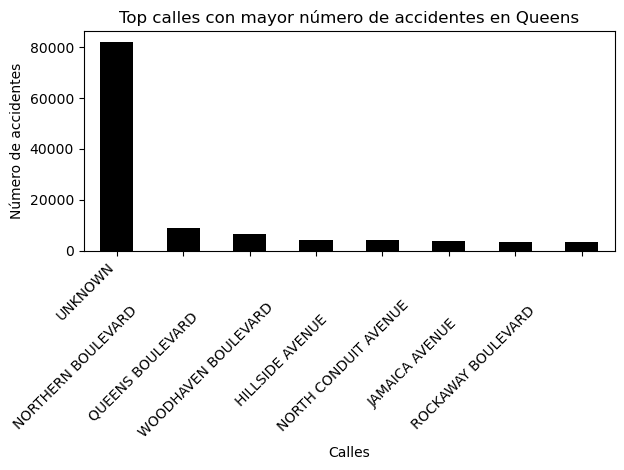

In [43]:
plt.figure()
top_calles_queens.plot(kind='bar', color='black')
plt.title('Top calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
top_calles_queens = cont_calles_queens.head(8).iloc[1:]
top_calles_queens

ON STREET NAME
NORTHERN BOULEVARD                  8827
QUEENS BOULEVARD                    6711
WOODHAVEN BOULEVARD                 4357
HILLSIDE AVENUE                     4024
NORTH CONDUIT AVENUE                3941
JAMAICA AVENUE                      3484
ROCKAWAY BOULEVARD                  3423
Name: count, dtype: int64

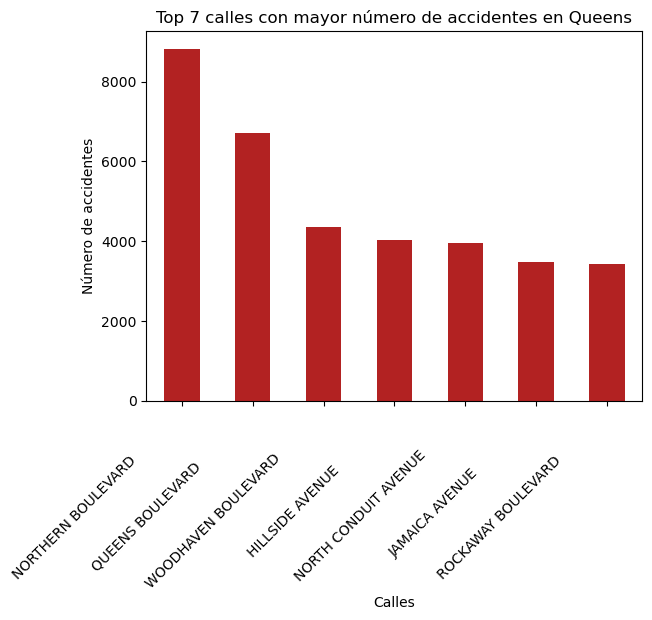

In [45]:
plt.figure()
top_calles_queens.plot(kind='bar', color='firebrick')
plt.title('Top 7 calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Numero de accidentes por tipo de coche en Queens

In [46]:
cont_coches_queens = df_queens['VEHICLE TYPE CODE 1'].value_counts()
cont_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109350
Station Wagon/Sport Utility Vehicle     93901
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
                                        ...  
Unkno                                       1
12 Pa                                       1
FRHT                                        1
FED E                                       1
U-HAUL                                      1
Name: count, Length: 537, dtype: int64

In [47]:
top_coches_queens = cont_coches_queens.head(8)
top_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109350
Station Wagon/Sport Utility Vehicle     93901
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
Pick-up Truck                            6533
UNKNOWN                                  4501
Taxi                                     4054
Name: count, dtype: int64

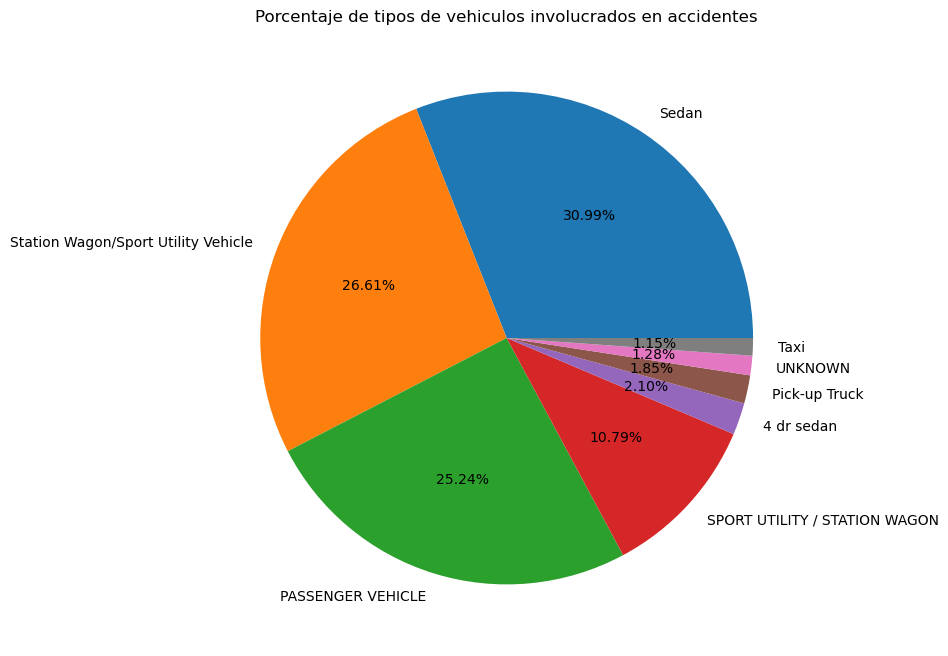

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(top_coches_queens,labels=top_coches_queens.index,autopct='%1.2f%%')
plt.title("Porcentaje de tipos de vehiculos involucrados en accidentes")
plt.show()

In [49]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

In [50]:
dataCoord = df[(df['LATITUDE'] != 0)&(df['LONGITUDE'] != 0)]
dataCoord

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,Other Vehicular,0,0,0,4486660,Sedan,Sedan,0,0,0
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,Other Vehicular,0,0,0,4487074,Sedan,0,0,0,0
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,0,...,Other Vehicular,0,0,0,4486519,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,Other Vehicular,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124470,07/10/2024,18:34,BRONX,10454.0,40.812263,-73.920590,"(40.812263, -73.92059)",WILLIS AVENUE,EAST 143 STREET,0,...,0,0,0,0,4746499,Taxi,0,0,0,0
2124502,07/19/2024,18:00,BROOKLYN,11207.0,40.675735,-73.896860,"(40.675735, -73.89686)",ATLANTIC AVENUE,PENNSYLVANIA AVENUE,0,...,Other Vehicular,0,0,0,4746359,Sedan,Sedan,0,0,0
2124566,07/07/2024,14:12,BRONX,10468.0,40.861084,-73.911490,"(40.861084, -73.91149)",0,0,2258 HAMPDEN PLACE,...,0,0,0,0,4746320,Sedan,0,0,0,0
2124604,07/21/2024,18:05,BROOKLYN,11224.0,40.572968,-74.000595,"(40.572968, -74.000595)",0,0,3514 SURF AVENUE,...,Other Vehicular,0,0,0,4746425,Station Wagon/Sport Utility Vehicle,Pick-up Truck,0,0,0


In [51]:
geometry = [Point(xy) for xy in zip(dataCoord['LATITUDE'], dataCoord['LONGITUDE'])]

In [52]:
collisions = gpd.GeoDataFrame(dataCoord, geometry=geometry, crs='EPSG:4326')

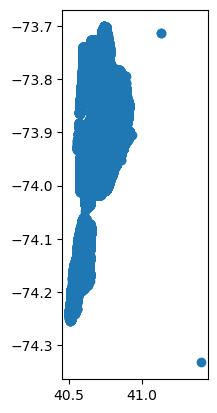

In [53]:
collisions.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

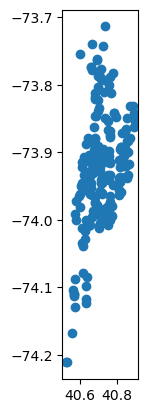

In [54]:
sampled_collisions = collisions.sample(n=200, random_state=8)
sampled_collisions.plot()
plt.show

In [55]:
sampled_collisions['geometry'] = sampled_collisions.apply(
    lambda x: Point((x['LONGITUDE'], x['LATITUDE'])), axis=1
)

In [56]:
sampled_collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
1533738,06/29/2014,13:00,STATEN ISLAND,10306,40.567629,-74.112611,"(40.5676287, -74.1126115)",HYLAN BOULEVARD,BEACH AVENUE,0,...,0,0,0,987829,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-74.11261 40.56763)
987078,11/21/2016,7:00,QUEENS,11369.0,40.763344,-73.877310,"(40.763344, -73.87731)",92 STREET,ASTORIA BOULEVARD,0,...,0,0,0,3567113,Sedan,Sedan,0,0,0,POINT (-73.87731 40.76334)
456760,03/17/2019,12:00,BRONX,10475.0,40.868790,-73.831680,"(40.86879, -73.83168)",BARTOW AVENUE,BAYCHESTER AVENUE,0,...,0,0,0,4110636,Sedan,0,0,0,0,POINT (-73.83168 40.86879)
1863450,11/03/2012,11:30,MANHATTAN,10018,40.756527,-73.994019,"(40.7565272, -73.994019)",WEST 39 STREET,9 AVENUE,0,...,0,0,0,27240,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,POINT (-73.99402 40.75653)
1188439,12/28/2015,20:15,BRONX,10453.0,40.849804,-73.920320,"(40.849804, -73.9203203)",POPHAM AVENUE,WEST 176 STREET,0,...,0,0,0,3361858,SPORT UTILITY / STATION WAGON,UNKNOWN,0,0,0,POINT (-73.92032 40.84980)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435684,12/05/2014,15:40,QUEENS,11412,40.693268,-73.763772,"(40.693268, -73.7637721)",MEXICO STREET,TURIN DRIVE,0,...,0,0,0,3131409,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-73.76377 40.69327)
1334154,06/04/2015,7:40,BROOKLYN,11234.0,40.613298,-73.922375,"(40.6132982, -73.9223747)",AVENUE S,EAST 54 STREET,0,...,0,0,0,3234313,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,POINT (-73.92237 40.61330)
1366130,03/26/2015,15:10,MANHATTAN,10128.0,40.777554,-73.948880,"(40.7775544, -73.9488804)",1 AVENUE,EAST 87 STREET,0,...,0,0,0,3192931,LIVERY VEHICLE,TAXI,0,0,0,POINT (-73.94888 40.77755)
1662935,10/10/2013,19:07,MANHATTAN,10036,40.762582,-74.000386,"(40.7625822, -74.0003863)",WEST SIDE HIGHWAY,WEST 43 STREET,0,...,0,0,0,43068,LIVERY VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-74.00039 40.76258)


In [57]:
my_map = folium.Map(
    location=[40.7,-74],
    zoom_start=9,
    tiles='Stamen Terrain'
)

basemaps = {
    'Google Maps' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Terrain' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite Hybrid' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Esri Satellite' : folium.TileLayer(
        tiles= 'https://server.arcgisionline.com/ArcGIS/reset/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    )
}

basemaps['Google Satellite Hybrid'].add_to(my_map)
folium.GeoJson(sampled_collisions).add_to(my_map)
plugins.Fullscreen().add_to(my_map)
my_map

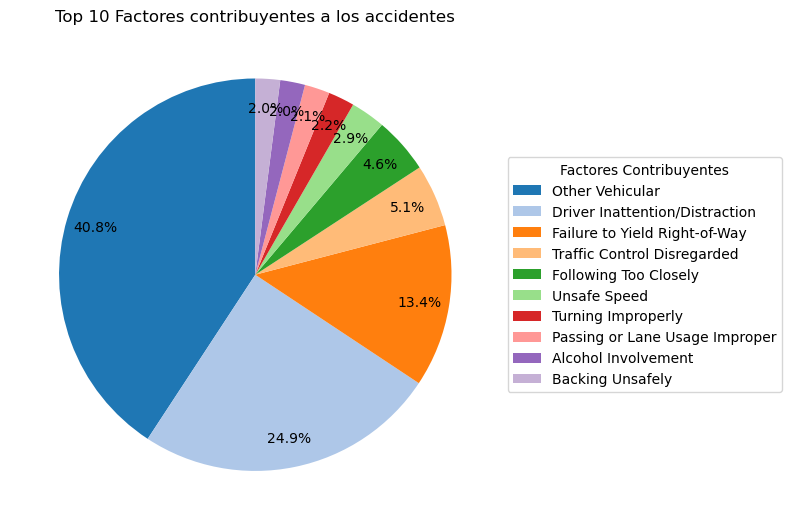

In [58]:
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], errors='coerce')
df = df.dropna(subset=['NUMBER OF PERSONS INJURED'])

df_grouped_pie = df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].sum().nlargest(10)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df_grouped_pie, autopct='%1.1f%%', startangle=90, 
                                   pctdistance=0.85, colors=plt.cm.tab20.colors)

plt.legend(wedges, df_grouped_pie.index, title="Factores Contribuyentes", loc="center left", 
           bbox_to_anchor=(1, 0.5), fontsize=10)

plt.title('Top 10 Factores contribuyentes a los accidentes')
plt.tight_layout()

plt.show()

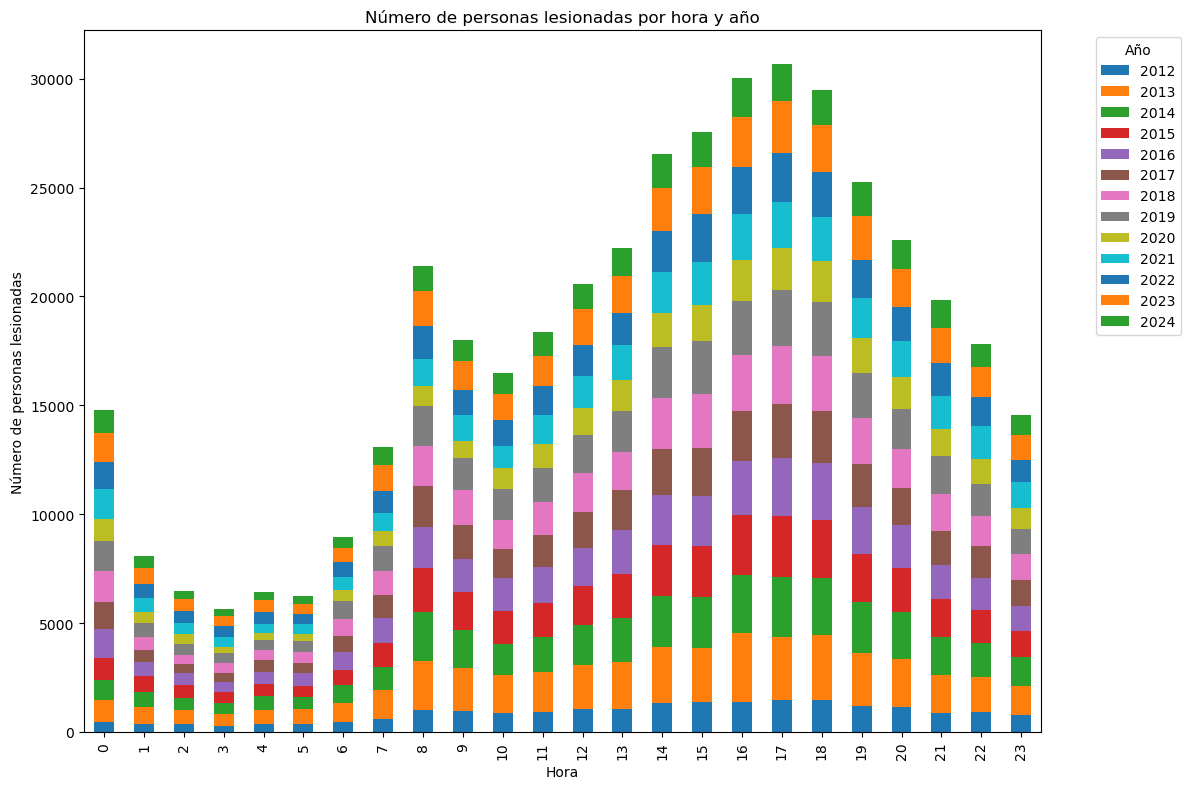

In [59]:
df = df.dropna(subset=['CRASH DATE', 'CRASH TIME', 'NUMBER OF PERSONS INJURED'])
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y', errors='coerce')
df['YEAR'] = df['CRASH DATE'].dt.year
df['HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS INJURED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas lesionadas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas lesionadas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

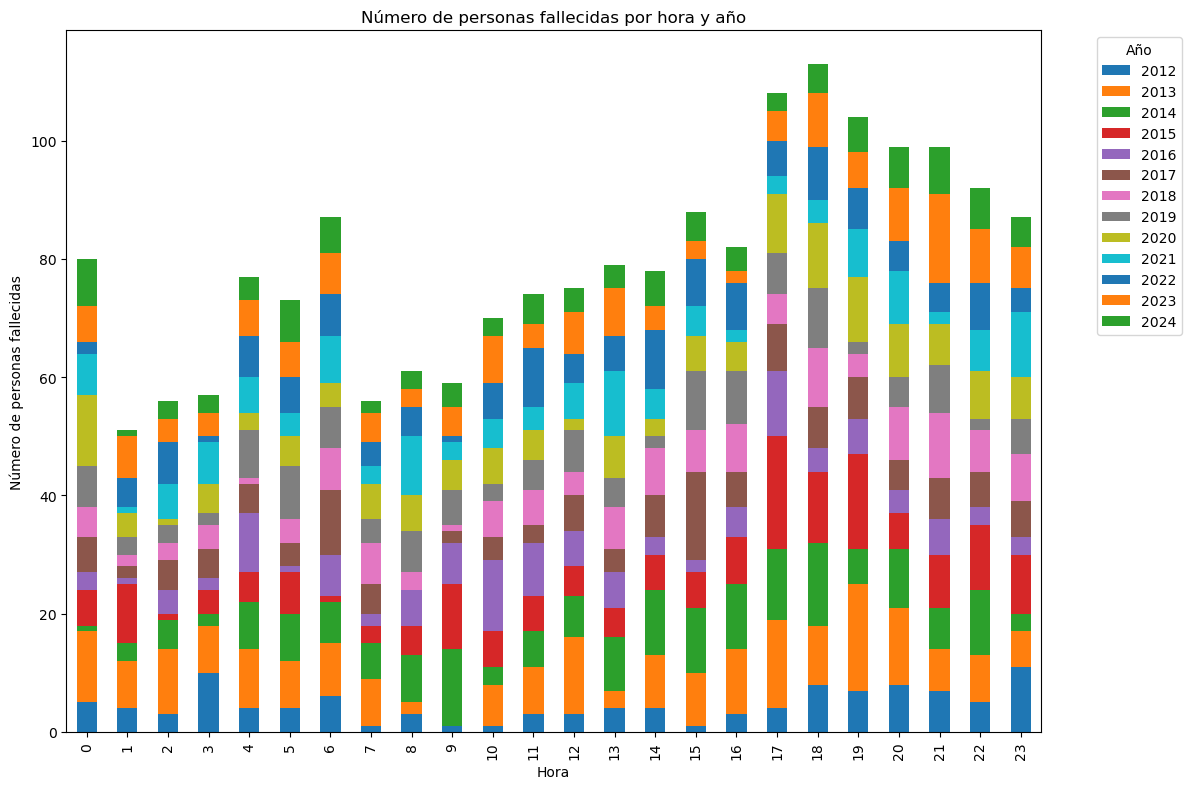

In [60]:
df['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], errors='coerce')
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(0)

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS KILLED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas fallecidas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas fallecidas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()